# 5. Use Dimensionality Reduction to Make Cluster Plot

In the following steps, you will:

- Load the brown dwarf dataset used to train the ML models.
- Prepare the X and y variables.
- Implement multiple dimensionality reduction methods
- Compare the resulting scatter plots and spot clusters 

In [1]:
from TelescopeML.DimensionalityReducer import *

## Data Preperation 

### Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 


Each spectrum has 104 wavelengths (i.e., 0.897, 0.906, ..., 2.512 μm) and 4 output atmospheric parameters:

- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])

In [2]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'

'C:\\Users\\abhin\\TelescopeML_project\\reference_data'

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head()

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


## Check atmospheric parameters


- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])

In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head()

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


### Prepare Inputs and outputs for ML models (X,y)
- X: 104 wavelengths and their corresponding flux values 
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

In [8]:
# Training  variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model

In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


## Implement Principal Component Analysis

Here we instantiate PCAModel to perform PCA on our dataset. This class:

- Takes data & generates PCA values
- Graphs PCA variances & scatterplots

In [11]:
# Instantiate PCA class
# PCA is done automatically with object initialization
# so now we can call methods to plot relevant data
pca_model = PCAModel(X, y)

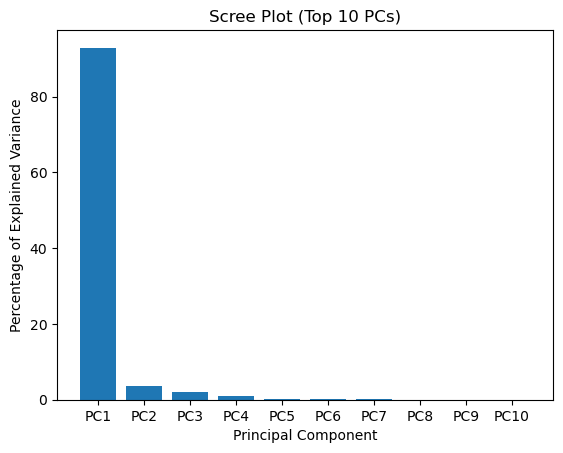

In [12]:
# Graph the top 10 PCs that contribute to dataset's variation
pca_model.graph_PC_variances(10)

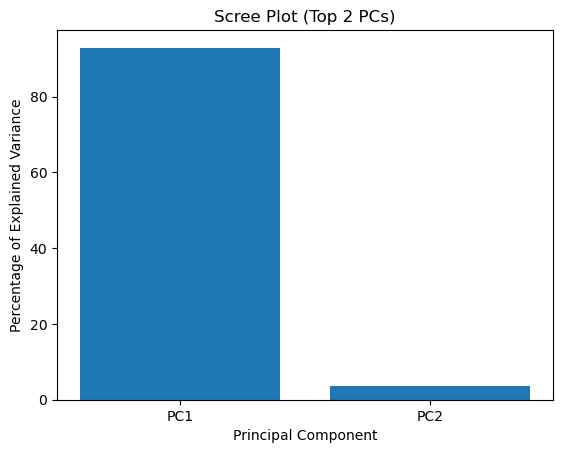

In [13]:
# Now just the top 2, the ones we will be plotting
pca_model.graph_PC_variances(2)

### Plot 2D Scatterplot

Using the top 2 principal components we can represent our 104D data in 2 dimensions on a scatterplot, allowing us to see clusters.

We graph PCA for each feature, color coding so that darker points = lower relative values of that class

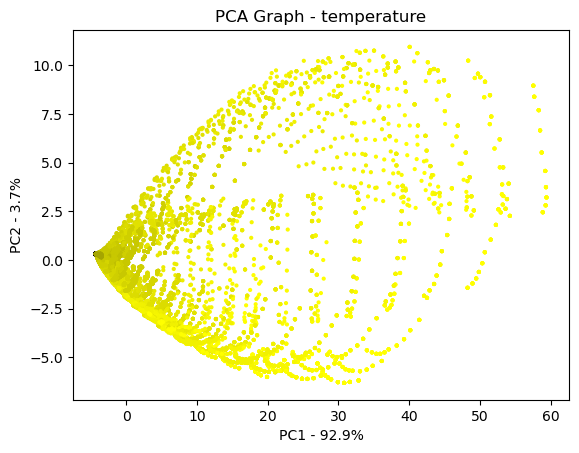

In [14]:
pca_model.plot_PCA_against_single_feature("temperature")

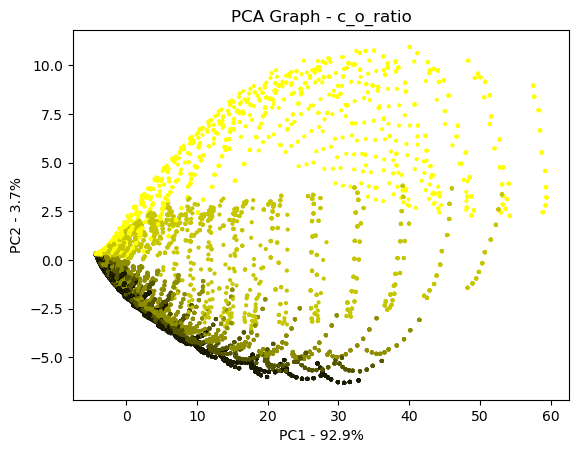

In [15]:
pca_model.plot_PCA_against_single_feature("c_o_ratio")

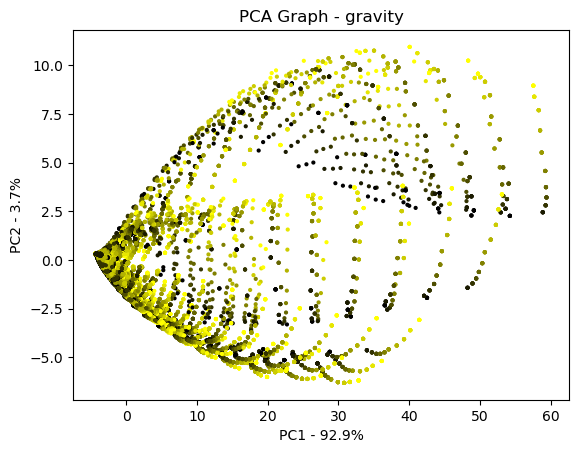

In [16]:
pca_model.plot_PCA_against_single_feature("gravity")

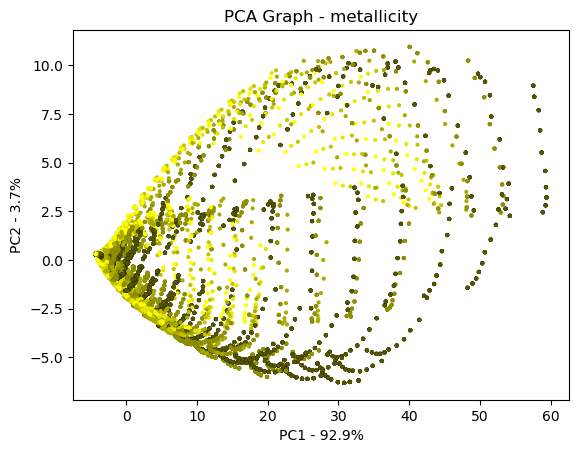

In [17]:
pca_model.plot_PCA_against_single_feature("metallicity")

As seen from the graphs above, PCA is not very effective at clustering our wavelengths since it's primarily meant to deal with linear data. Many neighboring points are of opposite values, making clustering nearly impossible for this data. Therefore, we will try a different method of dimensionality reduction:

## Implement Encoder-Decoder Model

To do this, we instantiate the EncoderDecoderModel class, feeding it our training data. The above processing is handled in the constructor, all we need to do is split our train/test data and train the model.

In [18]:
autoencoder = EncoderDecoderModel(train_BD)

In [19]:
# Split train & test data, 0.2 is how much of our data is test (in this case 20%)
autoencoder.standardize_and_split_train_test(0.2)

Let's see how the encoder/decoder model works so far, before training. As expected, it does a terrible job of reconstructing the 104D data.

1/1 [==============================] - 0s 96ms/step


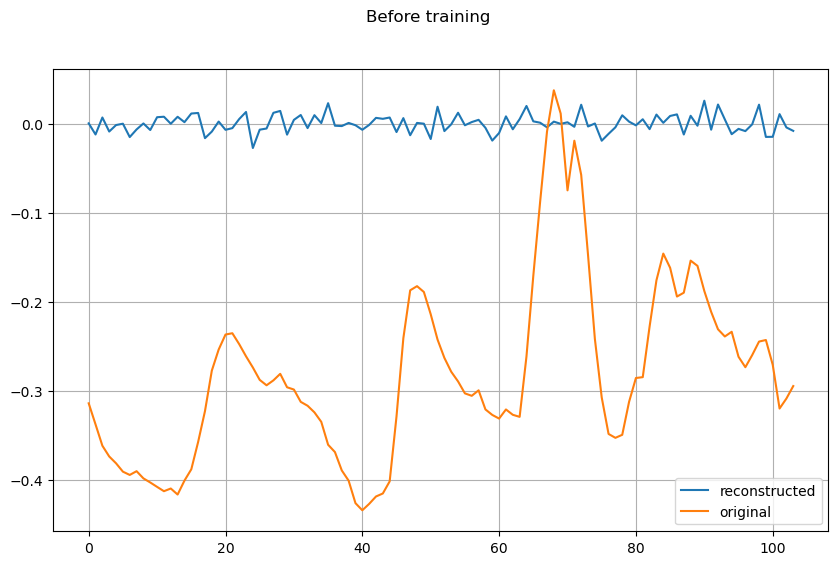

In [20]:
autoencoder.plot_orig_vs_recon('Before training')

In [21]:
# train our autoencoder
autoencoder.train(epochs=100, batch_size=50)

Epoch 1/100
495/495 [==============================] - 2s 2ms/step - loss: 0.1016
Epoch 2/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0223
Epoch 3/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0182
Epoch 4/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0152
Epoch 5/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 6/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 7/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 8/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 9/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 10/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 11/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 12/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 13/100


After training the model, we can graph the reconstructed against the original again to see the improvement.

1/1 [==============================] - 0s 70ms/step


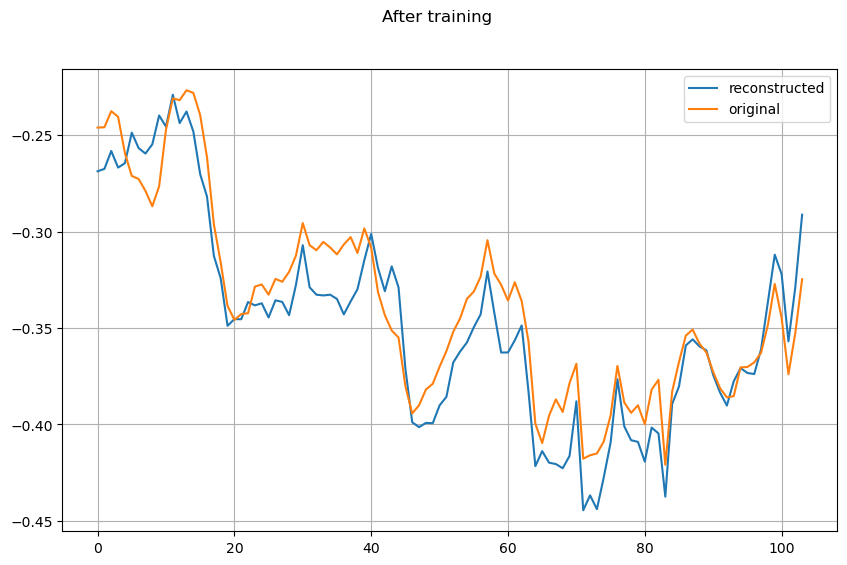

In [22]:
autoencoder.plot_orig_vs_recon('After training')

We can also plot the model's loss over time to make sure it converges properly.

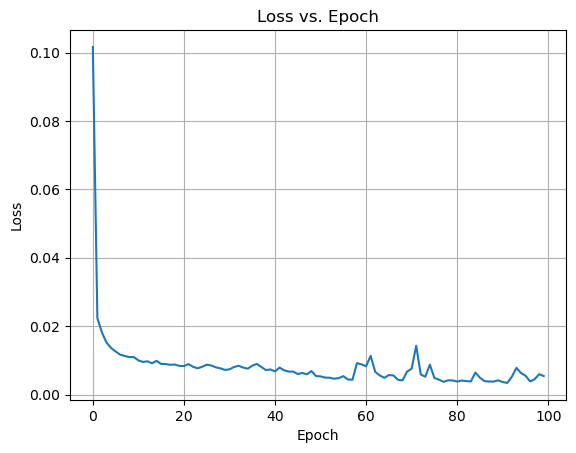

In [23]:
model_history = autoencoder.model_history

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

Next, we can plot the 2D space encoded by the model to try and identify signs of clusters

1/1 [==============================] - 0s 64ms/step


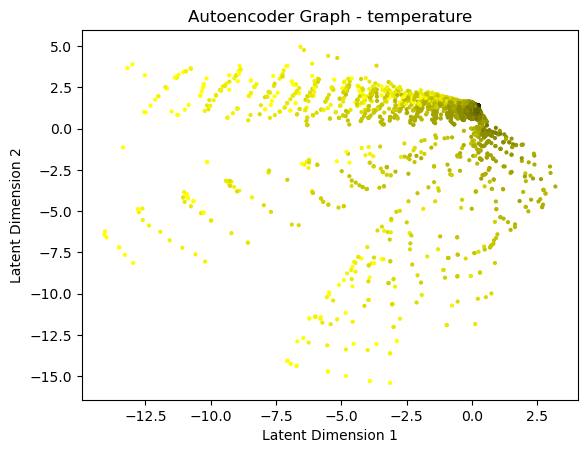

In [24]:
autoencoder.plot_encoded_against_single_feature('temperature')

1/1 [==============================] - 0s 20ms/step


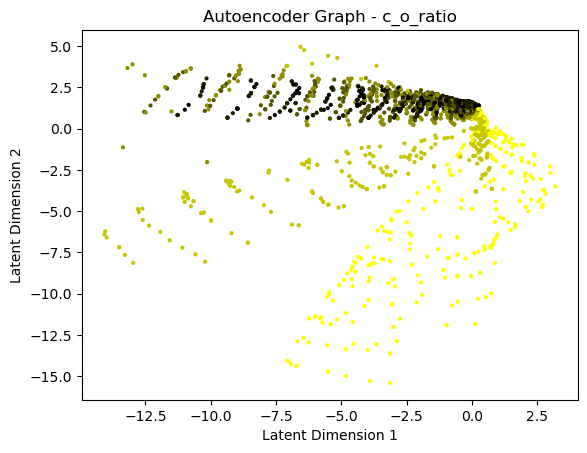

In [25]:
autoencoder.plot_encoded_against_single_feature('c_o_ratio')

1/1 [==============================] - 0s 19ms/step


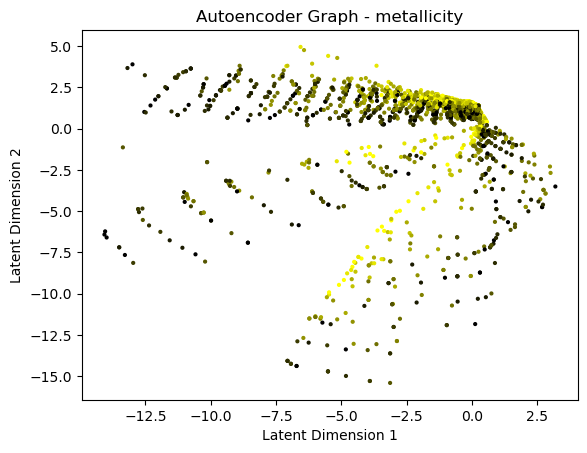

In [26]:
autoencoder.plot_encoded_against_single_feature('metallicity')

1/1 [==============================] - 0s 22ms/step


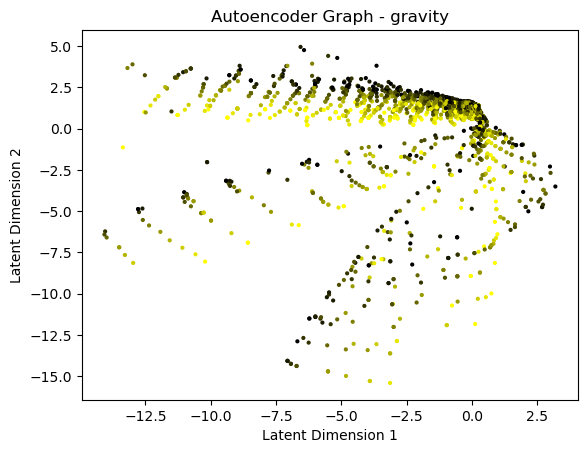

In [27]:
autoencoder.plot_encoded_against_single_feature('gravity')

### Saving the Models

We save the encoder and decoder seperately so that the encoder can be used for dimensionality reduction later on

In [28]:
# We save the encoder & decoder weights in seperate files
# this is automatically put into the reference data directory
decoder_path = autoencoder.save_decoder_weights('100epoch_9-13-24')
encoder_path = autoencoder.save_encoder_weights('100epoch_9-13-24')
encoder_path

'C:\\Users\\abhin\\TelescopeML_project\\reference_data\\trained_ML_models/trained_weights_encoder_100epoch_9-13-24.h5'

### Loading Models

We can load the models into our EncoderDecoderModel class, and from there, the encoder and decoder can be accessed seperately or used together.

In [31]:
new_model = EncoderDecoderModel(train_BD)
new_model.standardize_and_split_train_test(0.2)
new_model.load_decoder_weights(decoder_path)
new_model.load_encoder_weights(encoder_path)

1/1 [==============================] - 0s 89ms/step


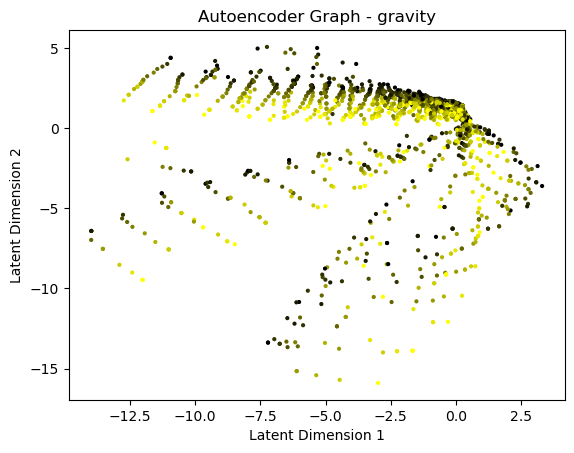

In [32]:
# Test loading by comparing to previous graph
new_model.plot_encoded_against_single_feature('gravity')